# Visualizing the dataset

In [4]:
# importing libraries
library(tidyverse)
library(repr)
library(janitor)
library(ggplot2)
library(tidymodels)
library(RColorBrewer)

In [5]:
# The Portuguese language dataset
data_por <- read_csv("../data/student-por.csv")

# The Math course dataset
data_mat <- read_csv("../data/student-mat.csv")

# Joining the datasets and cleaning the names
data <- full_join(data_mat, data_por) |>
        clean_names()

data <- data |>
  mutate(across(c(
    school, sex, address, famsize, pstatus, mjob, fjob, reason, guardian,
    schoolsup, famsup, paid, activities, nursery, higher, internet, romantic
  ), as.factor))

data_split <- initial_split(data, prop = 0.75, strata = dalc)

# training data
data_training <- training(data_split)

# testing data
data_testing <- testing(data_split)

Rows: 649 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 395 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Joining with `by = join_by(school, sex, age, address, famsize, Pstatus, Medu,
Fedu, Mjob, Fjob, reason, guardian, traveltime, studytim

In [6]:
head(data_training)

school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,⋯,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,M,16,U,LE3,T,2,2,other,other,⋯,4,4,4,1,1,3,0,12,12,11
GP,F,17,U,GT3,A,4,4,other,teacher,⋯,4,1,4,1,1,1,6,6,5,6
GP,M,15,U,LE3,A,3,2,services,other,⋯,4,2,2,1,1,1,0,16,18,19
GP,M,15,U,GT3,T,3,4,other,other,⋯,5,5,1,1,1,5,0,14,15,15


In [7]:
glimpse(data_training)

Rows: 783
Columns: 33
$ school     <fct> GP, GP, GP, GP, GP, GP, GP, GP, GP, GP, GP, GP, GP, GP, GP,…
$ sex        <fct> F, F, M, F, M, M, F, M, M, F, F, F, M, M, M, F, M, M, M, M,…
$ age        <dbl> 18, 15, 16, 17, 15, 15, 15, 15, 15, 16, 16, 16, 15, 15, 16,…
$ address    <fct> U, U, U, U, U, U, U, U, U, U, U, U, U, U, U, U, U, U, R, U,…
$ famsize    <fct> GT3, GT3, LE3, GT3, LE3, GT3, GT3, GT3, GT3, GT3, GT3, GT3,…
$ pstatus    <fct> A, T, T, A, A, T, T, T, A, T, T, T, T, T, T, T, T, T, T, T,…
$ medu       <dbl> 4, 4, 2, 4, 3, 3, 2, 4, 2, 4, 4, 3, 4, 4, 4, 2, 4, 4, 4, 3,…
$ fedu       <dbl> 4, 2, 2, 4, 2, 4, 1, 3, 2, 4, 4, 3, 3, 4, 2, 2, 4, 4, 3, 3,…
$ mjob       <fct> at_home, health, other, other, services, other, services, t…
$ fjob       <fct> teacher, services, other, teacher, other, other, other, oth…
$ reason     <fct> course, home, home, home, home, home, reputation, course, h…
$ guardian   <fct> mother, mother, mother, mother, mother, mother, father, mot…
$ traveltime <dbl>

In [8]:
data_initial <- data_training |>
                 group_by(dalc,school,sex,address) |>
                summarize(count = n()) |>
                mutate(school = fct_recode(school, "Gabriel Pereira" = "GP", "Mousinho de Silva" = "MS"),
                       sex = fct_recode(sex, "Female" = "F", "Male" = "M"),
                       address = fct_recode(address, "Rural" = "R", "Urban" = "U"))

head(data_initial)

`summarise()` has grouped output by 'dalc', 'school', 'sex'. You can override
using the `.groups` argument.


dalc,school,sex,address,count
<dbl>,<fct>,<fct>,<fct>,<int>
1,Gabriel Pereira,Female,Rural,43
1,Gabriel Pereira,Female,Urban,211
1,Gabriel Pereira,Male,Rural,27
1,Gabriel Pereira,Male,Urban,128
1,Mousinho de Silva,Female,Rural,51
1,Mousinho de Silva,Female,Urban,53


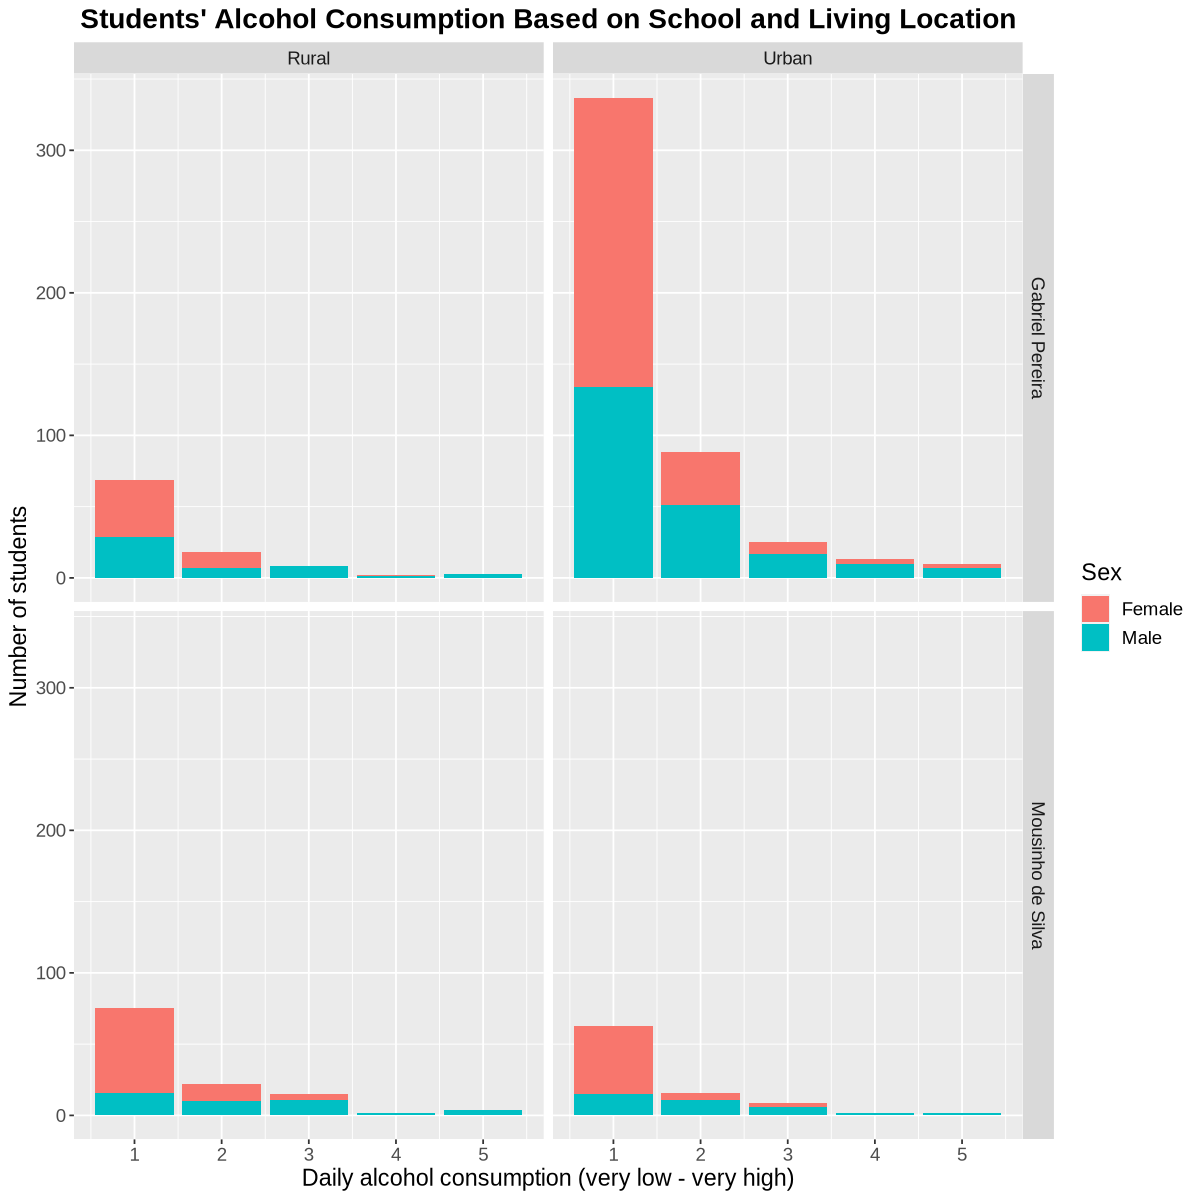

In [7]:
options(repr.plot.width = 10, repr.plot.height = 10)

data_initial_plot <- ggplot(data_initial, aes(x=dalc, y=count, fill=sex)) +
                    geom_bar(stat="identity") +
                    labs(x = "Daily alcohol consumption (very low - very high)",
                         y = "Number of students",
                         fill = "Sex",
                         title = "Students' Alcohol Consumption Based on School and Living Location") +
                    facet_grid(rows = vars(school), cols = vars(address)) +
                    theme(text = element_text(size = 14),
                          plot.title = element_text(hjust = 0.5, face = "bold"))

data_initial_plot

In [8]:
head(data_training)

school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,⋯,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,2,2,other,other,⋯,4,4,4,1,1,3,0,12,12,11
GP,M,15,U,LE3,A,3,2,services,other,⋯,4,2,2,1,1,1,0,16,18,19
GP,M,15,U,GT3,T,3,4,other,other,⋯,5,5,1,1,1,5,0,14,15,15


In [1]:
data_secondary <- data_training |>
                    select(age, dalc)

head(data_secondary)

#data_secondary_plot <-

#data_secondary_plot

ERROR: Error in select(data_training, age, dalc): could not find function "select"


In [5]:
head(data_training)

school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,⋯,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15
GP,M,16,U,LE3,T,2,2,other,other,⋯,4,4,4,1,1,3,0,12,12,11
GP,F,17,U,GT3,A,4,4,other,teacher,⋯,4,1,4,1,1,1,6,6,5,6


In [19]:
data_select <- data_training |>
                select(age) |>
                mutate(across(age,max))

head(data_select)

age
<dbl>
22
22
22
22
22
22


In [20]:
head(data_training)

school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,⋯,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15
GP,M,16,U,LE3,T,2,2,other,other,⋯,4,4,4,1,1,3,0,12,12,11
GP,F,17,U,GT3,A,4,4,other,teacher,⋯,4,1,4,1,1,1,6,6,5,6


In [9]:
data_grade <- data_training |>
                group_by(dalc) |>
                summarize(final_grade_mean = mean(g3, na.rm = TRUE),
                          final_grade_max = max(g3, na.rm = TRUE),
                          final_grade_min = min(g3, na.rm = TRUE))

data_grade

dalc,final_grade_mean,final_grade_max,final_grade_min
<dbl>,<dbl>,<dbl>,<dbl>
1,11.915441,20,0
2,10.815068,18,0
3,10.909091,17,0
4,9.470588,14,0
5,10.666667,16,5


In [11]:
data_summary_family <- data_training |>
                group_by(dalc) |>
                summarize(average_family_relationship = mean(famrel, na.rm = TRUE))

data_summary_family

dalc,average_family_relationship
<dbl>,<dbl>
1,4.025735
2,3.705479
3,3.909091
4,3.588235
5,4.000000


In [ ]:
# scatter plot of age with respect to family relationship, do facet grid on famsize and pstatus

